In [1]:
import os

import pandas as pd
import seaborn as sns
import numpy as np

In [8]:
df_results = pd.DataFrame()
for f in [f for f in os.listdir('../results/') if 'cnn' in f]:
    df_results = pd.concat((df_results,pd.read_csv(f'../results/{f}')))

df_results.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df_results.loc[
    (~df_results['train_synth_ratio'].isna()) & 
    (df_results['transform']=='minimal')
]

,epoch,test_losses,train_losses,test_accuracies,train_accuracies,train_synth_ratio,transform,sim_num,category,train_percentage,synth_percentage
0,0,0.799682,0.929265,0.624219,0.570508,NonDemented1.0_0.0__VeryMildDemented1.0_0.0__M...,minimal,0,minimal_NonDemented1.0_0.0__VeryMildDemented1....,NaN,NaN
1,1,0.337954,0.493307,0.876563,0.797461,NonDemented1.0_0.0__VeryMildDemented1.0_0.0__M...,minimal,0,minimal_NonDemented1.0_0.0__VeryMildDemented1....,NaN,NaN
2,2,0.189539,0.139260,0.934375,0.950391,NonDemented1.0_0.0__VeryMildDemented1.0_0.0__M...,minimal,0,minimal_NonDemented1.0_0.0__VeryMildDemented1....,NaN,NaN
3,3,0.140502,0.040005,0.951562,0.987305,NonDemented1.0_0.0__VeryMildDemented1.0_0.0__M...,minimal,0,minimal_NonDemented1.0_0.0__VeryMildDemented1....,NaN,NaN
4,4,0.104774,0.032128,0.967187,0.988086,NonDemented1.0_0.0__VeryMildDemented1.0_0.0__M...,minimal,0,minimal_NonDemented1.0_0.0__VeryMildDemented1....,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
295,10,0.293452,0.020947,0.939844,0.992676,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,19,minimal_NonDemented0.8_0.0__VeryMildDemented0....,NaN,NaN
296,11,0.310857,0.003022,0.946875,0.999512,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,19,minimal_NonDemented0.8_0.0__VeryMildDemented0....,NaN,NaN
297,12,0.290615,0.002289,0.948438,0.999756,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,19,minimal_NonDemented0.8_0.0__VeryMildDemented0....,NaN,NaN
298,13,0.322863,0.028275,0.916406,0.991943,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,19,minimal_NonDemented0.8_0.0__VeryMildDemented0....,NaN,NaN


<Axes: xlabel='epoch', ylabel='test_losses'>

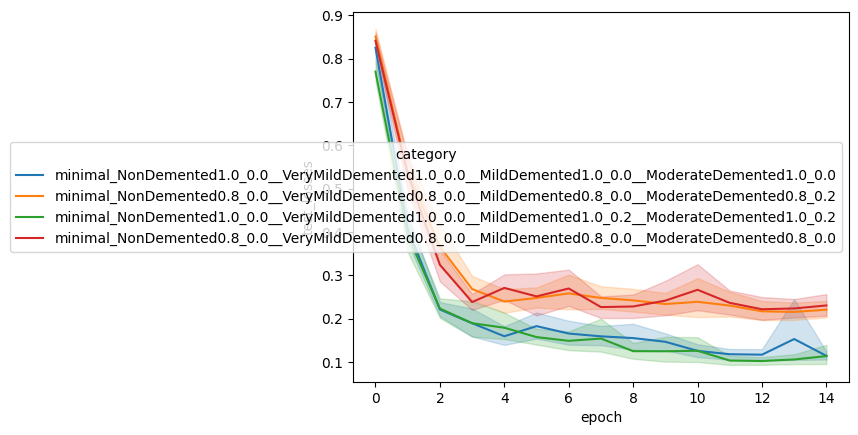

In [10]:
sns.lineplot(
    data=df_results.loc[
        (~df_results['train_synth_ratio'].isna()) & 
        (df_results['transform']=='minimal')],
    x='epoch',
    y='test_losses',
    hue='category'
)